# 株価予測(分類予測)

## 目的  
### 30日前までの情報を元に、7日後の始まり値が上がるか下がるかの予測モデルを作成する

### 週番号のリストを作成

In [1]:
import pandas as pd

In [2]:
#日経平均株価データ(1965-01-05 ~ 2021-10-21)
df = pd.read_csv('finance_dataset.csv')
df.tail()

,Date,High,Low,Open,Close
13962,2021-10-15,2.690117e+06,2.657175e+06,2.662822e+06,2.688848e+06
13963,2021-10-18,2.695851e+06,2.675507e+06,2.691178e+06,2.684855e+06
13964,2021-10-19,2.707705e+06,2.689472e+06,2.693348e+06,2.702436e+06
13965,2021-10-20,2.727743e+06,2.703065e+06,2.718200e+06,2.706138e+06
13966,2021-10-21,2.702926e+06,2.658233e+06,2.696628e+06,2.663157e+06


### 週番号  
### 曜日  
### 目的変数の追加

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13967 entries, 0 to 13966
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    13967 non-null  object 
 1   High    13967 non-null  float64
 2   Low     13967 non-null  float64
 3   Open    13967 non-null  float64
 4   Close   13967 non-null  float64
dtypes: float64(4), object(1)
memory usage: 545.7+ KB


In [4]:
df['Date']=pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13967 entries, 0 to 13966
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    13967 non-null  datetime64[ns]
 1   High    13967 non-null  float64       
 2   Low     13967 non-null  float64       
 3   Open    13967 non-null  float64       
 4   Close   13967 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 545.7 KB


In [5]:
from datetime import datetime
from datetime import timedelta
start = datetime(1965,1,4)
df.head()

,Date,High,Low,Open,Close
0,1965-01-05,116339.097290,116339.097290,116339.097290,116339.097290
1,1965-01-06,116919.074097,116919.074097,116919.074097,116919.074097
2,1965-01-07,117869.976807,117869.976807,117869.976807,117869.976807
3,1965-01-08,118994.779968,118994.779968,118994.779968,118994.779968
4,1965-01-12,119189.953613,119189.953613,119189.953613,119189.953613


In [6]:
df.set_index(keys='Date',inplace=True)
df.tail()

,High,Low,Open,Close
Date,,,,
2021-10-15,2.690117e+06,2.657175e+06,2.662822e+06,2.688848e+06
2021-10-18,2.695851e+06,2.675507e+06,2.691178e+06,2.684855e+06
2021-10-19,2.707705e+06,2.689472e+06,2.693348e+06,2.702436e+06
2021-10-20,2.727743e+06,2.703065e+06,2.718200e+06,2.706138e+06
2021-10-21,2.702926e+06,2.658233e+06,2.696628e+06,2.663157e+06


In [7]:
df_shift_7days=df.shift(-7)
df_shift_7days.tail(10)

,High,Low,Open,Close
Date,,,,
2021-10-08,2.707705e+06,2.689472e+06,2.693348e+06,2.702436e+06
2021-10-11,2.727743e+06,2.703065e+06,2.718200e+06,2.706138e+06
2021-10-12,2.702926e+06,2.658233e+06,2.696628e+06,2.663157e+06
2021-10-13,NaN,NaN,NaN,NaN
2021-10-14,NaN,NaN,NaN,NaN
2021-10-15,NaN,NaN,NaN,NaN
2021-10-18,NaN,NaN,NaN,NaN
2021-10-19,NaN,NaN,NaN,NaN
2021-10-20,NaN,NaN,NaN,NaN


In [8]:
#現在のデータから30日後のデータが上がっているか、下がっているかのカラムを追加
df['delta_Close']=df_shift_7days['Close']-df['Close']
df.tail(10)

,High,Low,Open,Close,delta_Close
Date,,,,,
2021-10-08,2.619725e+06,2.591747e+06,2.592902e+06,2.594527e+06,107908.657227
2021-10-11,2.643776e+06,2.580132e+06,2.587925e+06,2.636083e+06,70055.019531
2021-10-12,2.633371e+06,2.605390e+06,2.632446e+06,2.611331e+06,51826.015625
2021-10-13,2.623762e+06,2.589395e+06,2.597903e+06,2.602976e+06,NaN
2021-10-14,2.643343e+06,2.611646e+06,2.614458e+06,2.640961e+06,NaN
2021-10-15,2.690117e+06,2.657175e+06,2.662822e+06,2.688848e+06,NaN
2021-10-18,2.695851e+06,2.675507e+06,2.691178e+06,2.684855e+06,NaN
2021-10-19,2.707705e+06,2.689472e+06,2.693348e+06,2.702436e+06,NaN
2021-10-20,2.727743e+06,2.703065e+06,2.718200e+06,2.706138e+06,NaN


In [9]:
df['Up']=0
df['Up'][df['delta_Close']>0]=1
df=df.drop('delta_Close',axis=1)
df.tail(10)

C:\Users\Tsubasa\AppData\Local\Temp\ipykernel_124340\100578999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Up'][df['delta_Close']>0]=1


,High,Low,Open,Close,Up
Date,,,,,
2021-10-08,2.619725e+06,2.591747e+06,2.592902e+06,2.594527e+06,1
2021-10-11,2.643776e+06,2.580132e+06,2.587925e+06,2.636083e+06,1
2021-10-12,2.633371e+06,2.605390e+06,2.632446e+06,2.611331e+06,1
2021-10-13,2.623762e+06,2.589395e+06,2.597903e+06,2.602976e+06,0
2021-10-14,2.643343e+06,2.611646e+06,2.614458e+06,2.640961e+06,0
2021-10-15,2.690117e+06,2.657175e+06,2.662822e+06,2.688848e+06,0
2021-10-18,2.695851e+06,2.675507e+06,2.691178e+06,2.684855e+06,0
2021-10-19,2.707705e+06,2.689472e+06,2.693348e+06,2.702436e+06,0
2021-10-20,2.727743e+06,2.703065e+06,2.718200e+06,2.706138e+06,0


## データの全体像を掴む

<AxesSubplot: xlabel='Date'>

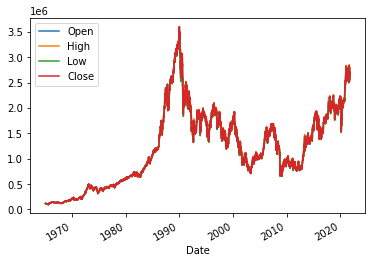

In [10]:
df_new=df[['Open','High','Low','Close']]

from matplotlib import pyplot as plt
%matplotlib inline

df_new.plot(kind='line')

## 特徴量の追加  
*  終値の前日比率  
*  始値・終値の差分

In [11]:

df['Close_ratio']=(df['Close']-df_shift_7days['Close'])/df_shift_7days['Close']
df.head()

,High,Low,Open,Close,Up,Close_ratio
Date,,,,,,
1965-01-05,116339.097290,116339.097290,116339.097290,116339.097290,1,-0.010978
1965-01-06,116919.074097,116919.074097,116919.074097,116919.074097,1,-0.004999
1965-01-07,117869.976807,117869.976807,117869.976807,117869.976807,0,0.004248
1965-01-08,118994.779968,118994.779968,118994.779968,118994.779968,0,0.012570
1965-01-12,119189.953613,119189.953613,119189.953613,119189.953613,0,0.021168


In [12]:
#始値と終値の差分を追加。
df['Body']=df['Open']-df['Close']
df.tail()

,High,Low,Open,Close,Up,Close_ratio,Body
Date,,,,,,,
2021-10-15,2.690117e+06,2.657175e+06,2.662822e+06,2.688848e+06,0,NaN,-26026.826172
2021-10-18,2.695851e+06,2.675507e+06,2.691178e+06,2.684855e+06,0,NaN,6323.242188
2021-10-19,2.707705e+06,2.689472e+06,2.693348e+06,2.702436e+06,0,NaN,-9087.221680
2021-10-20,2.727743e+06,2.703065e+06,2.718200e+06,2.706138e+06,0,NaN,12061.855469
2021-10-21,2.702926e+06,2.658233e+06,2.696628e+06,2.663157e+06,0,NaN,33471.088867


### 学習データと検証データに分割

In [13]:
df_train=df['1965-01-05':'2020-12-31']
df_train.head()

,High,Low,Open,Close,Up,Close_ratio,Body
Date,,,,,,,
1965-01-05,116339.097290,116339.097290,116339.097290,116339.097290,1,-0.010978,0.0
1965-01-06,116919.074097,116919.074097,116919.074097,116919.074097,1,-0.004999,0.0
1965-01-07,117869.976807,117869.976807,117869.976807,117869.976807,0,0.004248,0.0
1965-01-08,118994.779968,118994.779968,118994.779968,118994.779968,0,0.012570,0.0
1965-01-12,119189.953613,119189.953613,119189.953613,119189.953613,0,0.021168,0.0


In [14]:
df_val=df['2021-01-01':]
df_val.tail()

,High,Low,Open,Close,Up,Close_ratio,Body
Date,,,,,,,
2021-10-15,2.690117e+06,2.657175e+06,2.662822e+06,2.688848e+06,0,NaN,-26026.826172
2021-10-18,2.695851e+06,2.675507e+06,2.691178e+06,2.684855e+06,0,NaN,6323.242188
2021-10-19,2.707705e+06,2.689472e+06,2.693348e+06,2.702436e+06,0,NaN,-9087.221680
2021-10-20,2.727743e+06,2.703065e+06,2.718200e+06,2.706138e+06,0,NaN,12061.855469
2021-10-21,2.702926e+06,2.658233e+06,2.696628e+06,2.663157e+06,0,NaN,33471.088867


In [15]:
x_train=df_train[['High','Low','Open','Close','Close_ratio','Body']]
y_train=df_train['Up']

In [16]:
x_val=df_val[['High','Low','Open','Close','Close_ratio','Body']]
y_val=df_val['Up']

print(x_val)
#print(y_val)

                    High           Low          Open         Close  \
Date                                                                 
2021-01-04  2.553195e+06  2.501415e+06  2.550740e+06  2.521400e+06   
2021-01-05  2.523380e+06  2.504295e+06  2.511503e+06  2.512173e+06   
2021-01-06  2.515667e+06  2.497702e+06  2.507014e+06  2.502674e+06   
2021-01-07  2.555288e+06  2.528993e+06  2.528993e+06  2.542837e+06   
2021-01-08  2.602860e+06  2.559267e+06  2.564113e+06  2.602860e+06   
...                  ...           ...           ...           ...   
2021-10-15  2.690117e+06  2.657175e+06  2.662822e+06  2.688848e+06   
2021-10-18  2.695851e+06  2.675507e+06  2.691178e+06  2.684855e+06   
2021-10-19  2.707705e+06  2.689472e+06  2.693348e+06  2.702436e+06   
2021-10-20  2.727743e+06  2.703065e+06  2.718200e+06  2.706138e+06   
2021-10-21  2.702926e+06  2.658233e+06  2.696628e+06  2.663157e+06   

            Close_ratio          Body  
Date                                   
2021-01-0

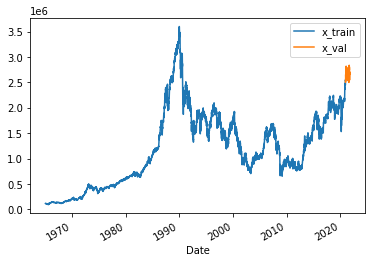

In [17]:
x_train['Close'].plot(kind='line')
x_val['Close'].plot(kind='line')

plt.legend(['x_train','x_val'])

plt.show()

### データを整える

In [18]:
from sklearn.preprocessing import StandardScaler

import numpy as np

def std_to_np(df):
    df_list=[]
    df=np.array(df)
    for i in range(0,len(df)-3,7):
        df_s=df[i:i+7]
        scl=StandardScaler()
        df_std=scl.fit_transform(df_s)
        df_list.append(df_std)
    return np.array(df_list)

In [19]:
#!pip install tensorflow

In [20]:
x_train_np_array=std_to_np(x_train)
x_val_np_array=std_to_np(x_val)

print(x_train_np_array.shape)
print(x_val_np_array.shape)

(1967, 7, 6)
(28, 7, 6)


In [21]:
print(y_train.shape)
print(y_val.shape)

(13770,)
(197,)


In [22]:
y_train_new=y_train[3::7]
y_val_new=y_val[3::7]

print(len(y_train_new))
print(len(y_val_new))

1967
28


### 予測モデルの作成

In [23]:
#!pip install tensorflow

In [24]:
from keras.models import Sequential
from keras.layers import Dense,LSTM
from keras.layers import Dropout

In [25]:
# LSTM構築とコンパイル関数
def lstm_comp(df):
    # 入力層/中間層/出力層のネットワークを構築
    model = Sequential()
    model.add(LSTM(256, activation='relu', batch_input_shape=(None, df.shape[1], df.shape[2])))
    model.add(Dropout(0.2))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))

    # ネットワークのコンパイル
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

### 交差検証  
予測モデルが使用できるかの確認

In [26]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score

In [27]:
valid_scores=[]
tscv=TimeSeriesSplit(n_splits=4)

for fold,(train_indices,valid_indices) in enumerate(tscv.split(x_train_np_array)):
    x_train,x_valid=x_train_np_array[train_indices],x_train_np_array[valid_indices]
    y_train,y_valid=y_train_new[train_indices],y_train_new[valid_indices]
    
    model=lstm_comp(x_train)
    
    model.fit(x_train,y_train,epochs=10,batch_size=64)
    
    y_valid_pred=model.predict(x_valid)
    
    y_valid_pred=np.where(y_valid_pred<0.5,0,1)
    
    score=accuracy_score(y_valid,y_valid_pred)
    print(f'fold{fold}MAE:{score}')
    
    valid_scores.append(score)

print(f'valid_scores:{valid_scores}')
cv_score=np.mean(valid_scores)
print(f'CV score:{cv_score}')

Epoch 1/10
7/7 [==============================] - 3s 25ms/step - loss: 0.6523 - accuracy: 0.5873
Epoch 2/10
7/7 [==============================] - 0s 24ms/step - loss: 0.5858 - accuracy: 0.7215
Epoch 3/10
7/7 [==============================] - 0s 26ms/step - loss: 0.5545 - accuracy: 0.7316
Epoch 4/10
7/7 [==============================] - 0s 27ms/step - loss: 0.5346 - accuracy: 0.7443
Epoch 5/10
7/7 [==============================] - 0s 26ms/step - loss: 0.5143 - accuracy: 0.7544
Epoch 6/10
7/7 [==============================] - 0s 27ms/step - loss: 0.5222 - accuracy: 0.7443
Epoch 7/10
7/7 [==============================] - 0s 28ms/step - loss: 0.4950 - accuracy: 0.7544
Epoch 8/10
7/7 [==============================] - 0s 27ms/step - loss: 0.4872 - accuracy: 0.7722
Epoch 9/10
7/7 [==============================] - 0s 29ms/step - loss: 0.4824 - accuracy: 0.7519
Epoch 10/10
13/13 [==============================] - 0s 10ms/step
fold0MAE:0.7633587786259542
Epoch 1/10
13/13 [===============

精度が0.774と高いので使用できるモデルであると確認。

#### モデルを用いた予測

In [28]:
model=lstm_comp(x_train_np_array)

In [29]:
result=model.fit(x_train_np_array,y_train_new,epochs=10,batch_size=64)

Epoch 1/10
31/31 [==============================] - 4s 30ms/step - loss: 0.6141 - accuracy: 0.6614
Epoch 2/10
31/31 [==============================] - 1s 28ms/step - loss: 0.5238 - accuracy: 0.7321
Epoch 3/10
31/31 [==============================] - 1s 29ms/step - loss: 0.4545 - accuracy: 0.7768
Epoch 4/10
31/31 [==============================] - 1s 30ms/step - loss: 0.4185 - accuracy: 0.7972
Epoch 5/10
31/31 [==============================] - 1s 28ms/step - loss: 0.4001 - accuracy: 0.8078
Epoch 6/10
31/31 [==============================] - 1s 30ms/step - loss: 0.4007 - accuracy: 0.8094
Epoch 7/10
31/31 [==============================] - 1s 29ms/step - loss: 0.3981 - accuracy: 0.8165
Epoch 8/10
31/31 [==============================] - 1s 30ms/step - loss: 0.3880 - accuracy: 0.8190
Epoch 9/10
31/31 [==============================] - 1s 31ms/step - loss: 0.3823 - accuracy: 0.8221
Epoch 10/10
31/31 [==============================] - 1s 29ms/step - loss: 0.3832 - accuracy: 0.8226


In [30]:
pred=model.predict(x_val_np_array)
pred[:10]

1/1 [==============================] - 0s 371ms/step


array([[0.97271013],
       [0.341631  ],
       [0.89105064],
       [0.88435477],
       [0.06564662],
       [0.53454643],
       [0.97344804],
       [0.2227942 ],
       [0.9878581 ],
       [0.05422333]], dtype=float32)

In [31]:
pred=np.where(pred<0.5,0,1)
pred[:10]

array([[1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0]])

In [32]:
print('accuracy=',accuracy_score(y_true=y_val_new,y_pred=pred))

accuracy= 0.6071428571428571


精度は0.607とまずまずの結果

In [33]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

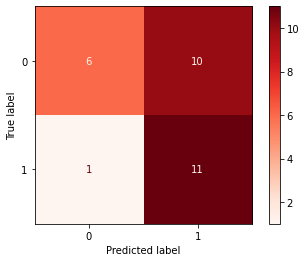

In [34]:
cm=confusion_matrix(y_val_new,pred)
cmp=ConfusionMatrixDisplay(cm)
cmp.plot(cmap=plt.cm.Reds)

### 考察  
そもそも7日後の予測をするのは難しいのではないか。  
特徴量にBodyを加えた程度では、予測は難しいのではないか  

### データに対して、次の日の終値を予測してみる。

In [35]:
df_shift_1days=df.shift(-1)
df_shift_1days.tail(5)

,High,Low,Open,Close,Up,Close_ratio,Body
Date,,,,,,,
2021-10-15,2.695851e+06,2.675507e+06,2.691178e+06,2.684855e+06,0.0,NaN,6323.242188
2021-10-18,2.707705e+06,2.689472e+06,2.693348e+06,2.702436e+06,0.0,NaN,-9087.221680
2021-10-19,2.727743e+06,2.703065e+06,2.718200e+06,2.706138e+06,0.0,NaN,12061.855469
2021-10-20,2.702926e+06,2.658233e+06,2.696628e+06,2.663157e+06,0.0,NaN,33471.088867
2021-10-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
#現在のデータから30日後のデータが上がっているか、下がっているかのカラムを追加
df['delta_Close']=df_shift_1days['Close']-df['Close']
df.tail(5)

,High,Low,Open,Close,Up,Close_ratio,Body,delta_Close
Date,,,,,,,,
2021-10-15,2.690117e+06,2.657175e+06,2.662822e+06,2.688848e+06,0,NaN,-26026.826172,-3993.217773
2021-10-18,2.695851e+06,2.675507e+06,2.691178e+06,2.684855e+06,0,NaN,6323.242188,17580.419922
2021-10-19,2.707705e+06,2.689472e+06,2.693348e+06,2.702436e+06,0,NaN,-9087.221680,3702.890625
2021-10-20,2.727743e+06,2.703065e+06,2.718200e+06,2.706138e+06,0,NaN,12061.855469,-42981.064453
2021-10-21,2.702926e+06,2.658233e+06,2.696628e+06,2.663157e+06,0,NaN,33471.088867,NaN


In [37]:
df['Up']=0
df['Up'][df['delta_Close']>0]=1
df=df.drop('delta_Close',axis=1)
df.tail(10)

C:\Users\Tsubasa\AppData\Local\Temp\ipykernel_124340\100578999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Up'][df['delta_Close']>0]=1


,High,Low,Open,Close,Up,Close_ratio,Body
Date,,,,,,,
2021-10-08,2.619725e+06,2.591747e+06,2.592902e+06,2.594527e+06,1,-0.039930,-1625.253906
2021-10-11,2.643776e+06,2.580132e+06,2.587925e+06,2.636083e+06,0,-0.025887,-48158.173828
2021-10-12,2.633371e+06,2.605390e+06,2.632446e+06,2.611331e+06,0,-0.019460,21115.112305
2021-10-13,2.623762e+06,2.589395e+06,2.597903e+06,2.602976e+06,1,NaN,-5072.685547
2021-10-14,2.643343e+06,2.611646e+06,2.614458e+06,2.640961e+06,1,NaN,-26503.056641
2021-10-15,2.690117e+06,2.657175e+06,2.662822e+06,2.688848e+06,0,NaN,-26026.826172
2021-10-18,2.695851e+06,2.675507e+06,2.691178e+06,2.684855e+06,1,NaN,6323.242188
2021-10-19,2.707705e+06,2.689472e+06,2.693348e+06,2.702436e+06,1,NaN,-9087.221680
2021-10-20,2.727743e+06,2.703065e+06,2.718200e+06,2.706138e+06,0,NaN,12061.855469


## 特徴量の追加  
*  終値の前日比率  
*  始値・終値の差分

In [38]:

df['Close_ratio']=(df['Close']-df_shift_1days['Close'])/df_shift_1days['Close']
df.head()

,High,Low,Open,Close,Up,Close_ratio,Body
Date,,,,,,,
1965-01-05,116339.097290,116339.097290,116339.097290,116339.097290,1,-0.004960,0.0
1965-01-06,116919.074097,116919.074097,116919.074097,116919.074097,1,-0.008067,0.0
1965-01-07,117869.976807,117869.976807,117869.976807,117869.976807,1,-0.009453,0.0
1965-01-08,118994.779968,118994.779968,118994.779968,118994.779968,1,-0.001638,0.0
1965-01-12,119189.953613,119189.953613,119189.953613,119189.953613,0,0.005360,0.0


In [39]:
#始値と終値の差分を追加。
df['Body']=df['Open']-df['Close']
df.tail()

,High,Low,Open,Close,Up,Close_ratio,Body
Date,,,,,,,
2021-10-15,2.690117e+06,2.657175e+06,2.662822e+06,2.688848e+06,0,0.001487,-26026.826172
2021-10-18,2.695851e+06,2.675507e+06,2.691178e+06,2.684855e+06,1,-0.006505,6323.242188
2021-10-19,2.707705e+06,2.689472e+06,2.693348e+06,2.702436e+06,1,-0.001368,-9087.221680
2021-10-20,2.727743e+06,2.703065e+06,2.718200e+06,2.706138e+06,0,0.016139,12061.855469
2021-10-21,2.702926e+06,2.658233e+06,2.696628e+06,2.663157e+06,0,NaN,33471.088867


### 学習データと検証データに分割

In [40]:
df_train=df['1965-01-05':'2020-12-31']
df_train.tail()

,High,Low,Open,Close,Up,Close_ratio,Body
Date,,,,,,,
2020-12-24,2.475719e+06,2.460987e+06,2.463748e+06,2.466822e+06,0,0.000440,-3074.721680
2020-12-25,2.471286e+06,2.464041e+06,2.470499e+06,2.465736e+06,1,-0.007352,4762.846680
2020-12-28,2.483998e+06,2.466475e+06,2.468944e+06,2.483998e+06,1,-0.025904,-15053.471680
2020-12-29,2.553233e+06,2.490206e+06,2.491615e+06,2.550054e+06,0,0.004518,-58438.681641
2020-12-30,2.550463e+06,2.528817e+06,2.549217e+06,2.538586e+06,0,0.006816,10630.996094


In [41]:
df_val=df['2021-01-01':]
df_val.tail()

,High,Low,Open,Close,Up,Close_ratio,Body
Date,,,,,,,
2021-10-15,2.690117e+06,2.657175e+06,2.662822e+06,2.688848e+06,0,0.001487,-26026.826172
2021-10-18,2.695851e+06,2.675507e+06,2.691178e+06,2.684855e+06,1,-0.006505,6323.242188
2021-10-19,2.707705e+06,2.689472e+06,2.693348e+06,2.702436e+06,1,-0.001368,-9087.221680
2021-10-20,2.727743e+06,2.703065e+06,2.718200e+06,2.706138e+06,0,0.016139,12061.855469
2021-10-21,2.702926e+06,2.658233e+06,2.696628e+06,2.663157e+06,0,NaN,33471.088867


In [42]:
x_train=df_train[['High','Low','Open','Close','Close_ratio','Body']]
y_train=df_train['Up']

In [43]:
x_val=df_val[['High','Low','Open','Close','Close_ratio','Body']]
y_val=df_val['Up']

print(x_val)
#print(y_val)

                    High           Low          Open         Close  \
Date                                                                 
2021-01-04  2.553195e+06  2.501415e+06  2.550740e+06  2.521400e+06   
2021-01-05  2.523380e+06  2.504295e+06  2.511503e+06  2.512173e+06   
2021-01-06  2.515667e+06  2.497702e+06  2.507014e+06  2.502674e+06   
2021-01-07  2.555288e+06  2.528993e+06  2.528993e+06  2.542837e+06   
2021-01-08  2.602860e+06  2.559267e+06  2.564113e+06  2.602860e+06   
...                  ...           ...           ...           ...   
2021-10-15  2.690117e+06  2.657175e+06  2.662822e+06  2.688848e+06   
2021-10-18  2.695851e+06  2.675507e+06  2.691178e+06  2.684855e+06   
2021-10-19  2.707705e+06  2.689472e+06  2.693348e+06  2.702436e+06   
2021-10-20  2.727743e+06  2.703065e+06  2.718200e+06  2.706138e+06   
2021-10-21  2.702926e+06  2.658233e+06  2.696628e+06  2.663157e+06   

            Close_ratio          Body  
Date                                   
2021-01-0

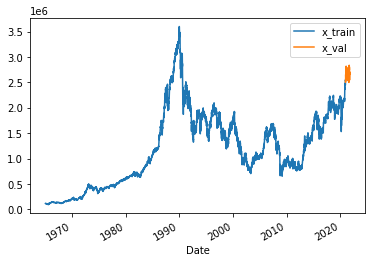

In [44]:
x_train['Close'].plot(kind='line')
x_val['Close'].plot(kind='line')

plt.legend(['x_train','x_val'])

plt.show()

### データを整える

In [45]:
from sklearn.preprocessing import StandardScaler

import numpy as np

def std_to_np(df):
    df_list=[]
    df=np.array(df)
    for i in range(0,len(df)-3,1):  #range(start,stop,step)
        df_s=df[i:i+1]
        scl=StandardScaler()
        df_std=scl.fit_transform(df_s)
        df_list.append(df_std)
    return np.array(df_list)

In [46]:
#!pip install tensorflow

In [47]:
x_train_np_array=std_to_np(x_train)
x_val_np_array=std_to_np(x_val)

print(x_train_np_array.shape)
print(x_val_np_array.shape)

(13767, 1, 6)
(194, 1, 6)


In [48]:
x_train_np_array

array([[[0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.]],

       ...,

       [[0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.]]])

In [49]:
print(y_train.shape)
print(y_val.shape)

(13770,)
(197,)


In [50]:
y_train_new=y_train[3::1]
y_val_new=y_val[3::1]

print(len(y_train_new))
print(len(y_val_new))

13767
194


### 予測モデルの作成

In [51]:
#!pip install tensorflow

In [52]:
from keras.models import Sequential
from keras.layers import Dense,LSTM
from keras.layers import Dropout

In [53]:
# LSTM構築とコンパイル関数
def lstm_comp(df):
    # 入力層/中間層/出力層のネットワークを構築
    model = Sequential()
    model.add(LSTM(256, activation='relu', batch_input_shape=(None, df.shape[1], df.shape[2])))
    model.add(Dropout(0.2))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))

    # ネットワークのコンパイル
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

### 交差検証  
予測モデルが使用できるかの確認

In [54]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score

In [55]:
valid_scores=[]
tscv=TimeSeriesSplit(n_splits=4)

for fold,(train_indices,valid_indices) in enumerate(tscv.split(x_train_np_array)):
    x_train,x_valid=x_train_np_array[train_indices],x_train_np_array[valid_indices]
    y_train,y_valid=y_train_new[train_indices],y_train_new[valid_indices]
    
    model=lstm_comp(x_train)
    
    model.fit(x_train,y_train,epochs=10,batch_size=64)
    
    y_valid_pred=model.predict(x_valid)
    
    y_valid_pred=np.where(y_valid_pred<0.5,0,1)
    
    score=accuracy_score(y_valid,y_valid_pred)
    print(f'fold{fold}MAE:{score}')
    
    valid_scores.append(score)

print(f'valid_scores:{valid_scores}')
cv_score=np.mean(valid_scores)
print(f'CV score:{cv_score}')

Epoch 1/10
44/44 [==============================] - 3s 10ms/step - loss: 0.6931 - accuracy: 0.5082
Epoch 2/10
44/44 [==============================] - 0s 11ms/step - loss: 0.6930 - accuracy: 0.5183
Epoch 3/10
44/44 [==============================] - 0s 10ms/step - loss: 0.6928 - accuracy: 0.5183
Epoch 4/10
44/44 [==============================] - 1s 11ms/step - loss: 0.6927 - accuracy: 0.5183
Epoch 5/10
44/44 [==============================] - 0s 11ms/step - loss: 0.6926 - accuracy: 0.5183
Epoch 6/10
44/44 [==============================] - 0s 11ms/step - loss: 0.6925 - accuracy: 0.5183
Epoch 7/10
44/44 [==============================] - 0s 11ms/step - loss: 0.6925 - accuracy: 0.5183
Epoch 8/10
44/44 [==============================] - 1s 12ms/step - loss: 0.6925 - accuracy: 0.5183
Epoch 9/10
44/44 [==============================] - 0s 11ms/step - loss: 0.6925 - accuracy: 0.5183
Epoch 10/10
87/87 [==============================] - 1s 5ms/step
fold0MAE:0.5408645114420632
Epoch 1/10
87/87

モデル精度は0.518とイマイチ

#### モデルを用いた予測

In [56]:
model=lstm_comp(x_train_np_array)

In [57]:
result=model.fit(x_train_np_array,y_train_new,epochs=10,batch_size=64)

Epoch 1/10
216/216 [==============================] - 4s 10ms/step - loss: 0.6929 - accuracy: 0.5173
Epoch 2/10
216/216 [==============================] - 2s 10ms/step - loss: 0.6925 - accuracy: 0.5188
Epoch 3/10
216/216 [==============================] - 2s 11ms/step - loss: 0.6925 - accuracy: 0.5188
Epoch 4/10
216/216 [==============================] - 2s 11ms/step - loss: 0.6925 - accuracy: 0.5188
Epoch 5/10
216/216 [==============================] - 2s 10ms/step - loss: 0.6925 - accuracy: 0.5188
Epoch 6/10
216/216 [==============================] - 2s 10ms/step - loss: 0.6925 - accuracy: 0.5188
Epoch 7/10
216/216 [==============================] - 2s 10ms/step - loss: 0.6925 - accuracy: 0.5188
Epoch 8/10
216/216 [==============================] - 2s 10ms/step - loss: 0.6925 - accuracy: 0.5188
Epoch 9/10
216/216 [==============================] - 2s 11ms/step - loss: 0.6925 - accuracy: 0.5188
Epoch 10/10
216/216 [==============================] - 2s 11ms/step - loss: 0.6925 - accura

In [58]:
pred=model.predict(x_val_np_array)
pred[:10]

7/7 [==============================] - 0s 4ms/step


array([[0.5184627],
       [0.5184627],
       [0.5184627],
       [0.5184627],
       [0.5184627],
       [0.5184627],
       [0.5184627],
       [0.5184627],
       [0.5184627],
       [0.5184627]], dtype=float32)

In [59]:
x_val_np_array

array([[[0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.]],

       ...,

       [[0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.]]])

In [60]:
pred=np.where(pred<0.5,0,1)
pred[:10]

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [61]:
print('accuracy=',accuracy_score(y_true=y_val_new,y_pred=pred))

accuracy= 0.520618556701031


testデータの精度は0.52なので最終的には使えるレベル

In [62]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

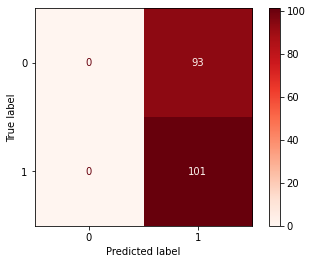

In [63]:
cm=confusion_matrix(y_val_new,pred)
cmp=ConfusionMatrixDisplay(cm)
cmp.plot(cmap=plt.cm.Reds)

### 考察  
なぜか次の日の予測をした方が7日後の予測よりも精度が落ちてしまった。  
特徴量が不十分の可能性あり  
予測がすべて1になっている。

特徴量を加えて学習させてみる。

In [64]:
df

,High,Low,Open,Close,Up,Close_ratio,Body
Date,,,,,,,
1965-01-05,1.163391e+05,1.163391e+05,1.163391e+05,1.163391e+05,1,-0.004960,0.000000
1965-01-06,1.169191e+05,1.169191e+05,1.169191e+05,1.169191e+05,1,-0.008067,0.000000
1965-01-07,1.178700e+05,1.178700e+05,1.178700e+05,1.178700e+05,1,-0.009453,0.000000
1965-01-08,1.189948e+05,1.189948e+05,1.189948e+05,1.189948e+05,1,-0.001638,0.000000
1965-01-12,1.191900e+05,1.191900e+05,1.191900e+05,1.191900e+05,0,0.005360,0.000000
...,...,...,...,...,...,...,...
2021-10-15,2.690117e+06,2.657175e+06,2.662822e+06,2.688848e+06,0,0.001487,-26026.826172
2021-10-18,2.695851e+06,2.675507e+06,2.691178e+06,2.684855e+06,1,-0.006505,6323.242188
2021-10-19,2.707705e+06,2.689472e+06,2.693348e+06,2.702436e+06,1,-0.001368,-9087.221680


In [65]:
df_technical=df.copy()

In [66]:
#移動平均の追加(特徴量)
sma1=5
sma2=10
sma3=15

df_technical['sma1']=df_technical['Close'].rolling(sma1).mean()
df_technical['sma2']=df_technical['Close'].rolling(sma2).mean()
df_technical['sma3']=df_technical['Close'].rolling(sma3).mean()


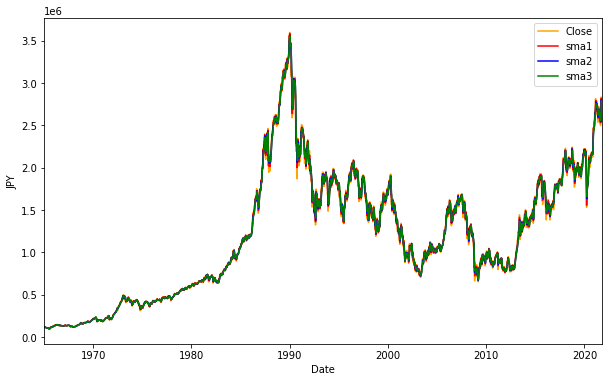

In [67]:
plt.figure(figsize=(10,6))

plt.plot(df_technical['Close'],label='Close',color='orange')
plt.plot(df_technical['sma1'],label='sma1',color='red')
plt.plot(df_technical['sma2'],label='sma2',color='blue')
plt.plot(df_technical['sma3'],label='sma3',color='green')
plt.xlabel('Date')
plt.ylabel('JPY')
plt.legend()
xmin=datetime(1965,1,5)
xmax=datetime(2021,10,21)
plt.xlim([xmin,xmax])
plt.show()

In [68]:
df_technical.head()

,High,Low,Open,Close,Up,Close_ratio,Body,sma1,sma2,sma3
Date,,,,,,,,,,
1965-01-05,116339.097290,116339.097290,116339.097290,116339.097290,1,-0.004960,0.0,NaN,NaN,NaN
1965-01-06,116919.074097,116919.074097,116919.074097,116919.074097,1,-0.008067,0.0,NaN,NaN,NaN
1965-01-07,117869.976807,117869.976807,117869.976807,117869.976807,1,-0.009453,0.0,NaN,NaN,NaN
1965-01-08,118994.779968,118994.779968,118994.779968,118994.779968,1,-0.001638,0.0,NaN,NaN,NaN
1965-01-12,119189.953613,119189.953613,119189.953613,119189.953613,0,0.005360,0.0,117862.576355,NaN,NaN


In [69]:
#欠損値を含む日を削除する。
df_technical=df_technical.dropna(how='any')
df_technical.head()

,High,Low,Open,Close,Up,Close_ratio,Body,sma1,sma2,sma3
Date,,,,,,,,,,
1965-01-27,116384.421387,116384.421387,116384.421387,116384.421387,0,0.008828,0.0,116332.993103,117200.644684,117421.288574
1965-01-28,115365.995483,115365.995483,115365.995483,115365.995483,0,0.003968,0.0,115902.682922,116881.796326,117356.415120
1965-01-29,114909.976807,114909.976807,114909.976807,114909.976807,1,-0.000451,0.0,115540.824097,116444.919006,117222.475301
1965-02-01,114961.770935,114961.770935,114961.770935,114961.770935,0,0.003294,0.0,115413.358826,116178.055603,117028.594910
1965-02-02,114584.375000,114584.375000,114584.375000,114584.375000,1,-0.007436,0.0,115241.307922,115885.848419,116734.567912


新たに移動平均を加えたデータでモデルを作成する。

In [70]:
df_train=df_technical['1965-01-05':'2020-12-31']
df_train.tail()

,High,Low,Open,Close,Up,Close_ratio,Body,sma1,sma2,sma3
Date,,,,,,,,,,
2020-12-24,2.475719e+06,2.460987e+06,2.463748e+06,2.466822e+06,0,0.000440,-3074.721680,2.462486e+06,2.467384e+06,2.467186e+06
2020-12-25,2.471286e+06,2.464041e+06,2.470499e+06,2.465736e+06,1,-0.007352,4762.846680,2.460510e+06,2.467422e+06,2.466602e+06
2020-12-28,2.483998e+06,2.466475e+06,2.468944e+06,2.483998e+06,1,-0.025904,-15053.471680,2.463093e+06,2.468546e+06,2.468493e+06
2020-12-29,2.553233e+06,2.490206e+06,2.491615e+06,2.550054e+06,0,0.004518,-58438.681641,2.484031e+06,2.476689e+06,2.475283e+06
2020-12-30,2.550463e+06,2.528817e+06,2.549217e+06,2.538586e+06,0,0.006816,10630.996094,2.501039e+06,2.483042e+06,2.479144e+06


In [71]:
df_val=df_technical['2021-01-01':]
df_val.tail()

,High,Low,Open,Close,Up,Close_ratio,Body,sma1,sma2,sma3
Date,,,,,,,,,,
2021-10-14,2.643343e+06,2.611646e+06,2.614458e+06,2.640961e+06,1,-0.017810,-26503.056641,2.617176e+06,2.605856e+06,2.660201e+06
2021-10-15,2.690117e+06,2.657175e+06,2.662822e+06,2.688848e+06,0,0.001487,-26026.826172,2.636040e+06,2.608608e+06,2.652923e+06
2021-10-18,2.695851e+06,2.675507e+06,2.691178e+06,2.684855e+06,1,-0.006505,6323.242188,2.645794e+06,2.613978e+06,2.645433e+06
2021-10-19,2.707705e+06,2.689472e+06,2.693348e+06,2.702436e+06,1,-0.001368,-9087.221680,2.664015e+06,2.626867e+06,2.639461e+06
2021-10-20,2.727743e+06,2.703065e+06,2.718200e+06,2.706138e+06,0,0.016139,12061.855469,2.684648e+06,2.642839e+06,2.637680e+06


In [72]:
x_train=df_train[['High','Low','Open','Close','Close_ratio','Body','sma1','sma2','sma3']]
y_train=df_train['Up']

In [73]:
x_val=df_val[['High','Low','Open','Close','Close_ratio','Body','sma1','sma2','sma3']]
y_val=df_val['Up']

print(x_val)
#print(y_val)

                    High           Low          Open         Close  \
Date                                                                 
2021-01-04  2.553195e+06  2.501415e+06  2.550740e+06  2.521400e+06   
2021-01-05  2.523380e+06  2.504295e+06  2.511503e+06  2.512173e+06   
2021-01-06  2.515667e+06  2.497702e+06  2.507014e+06  2.502674e+06   
2021-01-07  2.555288e+06  2.528993e+06  2.528993e+06  2.542837e+06   
2021-01-08  2.602860e+06  2.559267e+06  2.564113e+06  2.602860e+06   
...                  ...           ...           ...           ...   
2021-10-14  2.643343e+06  2.611646e+06  2.614458e+06  2.640961e+06   
2021-10-15  2.690117e+06  2.657175e+06  2.662822e+06  2.688848e+06   
2021-10-18  2.695851e+06  2.675507e+06  2.691178e+06  2.684855e+06   
2021-10-19  2.707705e+06  2.689472e+06  2.693348e+06  2.702436e+06   
2021-10-20  2.727743e+06  2.703065e+06  2.718200e+06  2.706138e+06   

            Close_ratio          Body          sma1          sma2  \
Date                

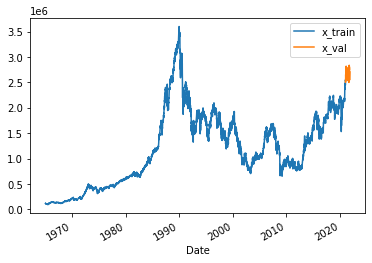

In [74]:
x_train['Close'].plot(kind='line')
x_val['Close'].plot(kind='line')

plt.legend(['x_train','x_val'])

plt.show()

### データを整える

In [75]:
from sklearn.preprocessing import StandardScaler

import numpy as np

def std_to_np(df):
    df_list=[]
    df=np.array(df)
    for i in range(0,len(df)-3,7):
        df_s=df[i:i+7]
        scl=StandardScaler()
        df_std=scl.fit_transform(df_s)
        df_list.append(df_std)
    return np.array(df_list)

In [76]:
#!pip install tensorflow

In [77]:
x_train_np_array=std_to_np(x_train)
x_val_np_array=std_to_np(x_val)

print(x_train_np_array.shape)
print(x_val_np_array.shape)

(1965, 7, 9)
(28, 7, 9)


In [78]:
print(y_train.shape)
print(y_val.shape)

(13756,)
(196,)


In [79]:
y_train_new=y_train[3::7]
y_val_new=y_val[3::7]

print(len(y_train_new))
print(len(y_val_new))

1965
28


### 予測モデルの作成

In [80]:
#!pip install tensorflow

In [81]:
from keras.models import Sequential
from keras.layers import Dense,LSTM
from keras.layers import Dropout

In [82]:
# LSTM構築とコンパイル関数
def lstm_comp(df):
    # 入力層/中間層/出力層のネットワークを構築
    model = Sequential()
    model.add(LSTM(256, activation='relu', batch_input_shape=(None, df.shape[1], df.shape[2])))
    model.add(Dropout(0.2))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))

    # ネットワークのコンパイル
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

### 交差検証  
予測モデルが使用できるかの確認

In [83]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score

In [84]:
valid_scores=[]
tscv=TimeSeriesSplit(n_splits=4)

for fold,(train_indices,valid_indices) in enumerate(tscv.split(x_train_np_array)):
    x_train,x_valid=x_train_np_array[train_indices],x_train_np_array[valid_indices]
    y_train,y_valid=y_train_new[train_indices],y_train_new[valid_indices]
    
    model=lstm_comp(x_train)
    
    model.fit(x_train,y_train,epochs=10,batch_size=64)
    
    y_valid_pred=model.predict(x_valid)
    
    y_valid_pred=np.where(y_valid_pred<0.5,0,1)
    
    score=accuracy_score(y_valid,y_valid_pred)
    print(f'fold{fold}MAE:{score}')
    
    valid_scores.append(score)

print(f'valid_scores:{valid_scores}')
cv_score=np.mean(valid_scores)
print(f'CV score:{cv_score}')

Epoch 1/10
7/7 [==============================] - 3s 29ms/step - loss: 0.6685 - accuracy: 0.6590
Epoch 2/10
7/7 [==============================] - 0s 31ms/step - loss: 0.6336 - accuracy: 0.6921
Epoch 3/10
7/7 [==============================] - 0s 32ms/step - loss: 0.6063 - accuracy: 0.7099
Epoch 4/10
7/7 [==============================] - 0s 33ms/step - loss: 0.5997 - accuracy: 0.6997
Epoch 5/10
7/7 [==============================] - 0s 32ms/step - loss: 0.5865 - accuracy: 0.7023
Epoch 6/10
7/7 [==============================] - 0s 31ms/step - loss: 0.5823 - accuracy: 0.7023
Epoch 7/10
7/7 [==============================] - 0s 29ms/step - loss: 0.5696 - accuracy: 0.7099
Epoch 8/10
7/7 [==============================] - 0s 34ms/step - loss: 0.5716 - accuracy: 0.7226
Epoch 9/10
7/7 [==============================] - 0s 39ms/step - loss: 0.5477 - accuracy: 0.7226
Epoch 10/10
13/13 [==============================] - 1s 13ms/step
fold0MAE:0.7379134860050891
Epoch 1/10
13/13 [===============

精度が0.80と高いので使用できるモデルであると確認。

#### モデルを用いた予測

In [85]:
model=lstm_comp(x_train_np_array)

In [86]:
result=model.fit(x_train_np_array,y_train_new,epochs=10,batch_size=64)

Epoch 1/10
31/31 [==============================] - 4s 42ms/step - loss: 0.6299 - accuracy: 0.6621
Epoch 2/10
31/31 [==============================] - 1s 35ms/step - loss: 0.5874 - accuracy: 0.7003
Epoch 3/10
31/31 [==============================] - 1s 35ms/step - loss: 0.5434 - accuracy: 0.7247
Epoch 4/10
31/31 [==============================] - 1s 37ms/step - loss: 0.4752 - accuracy: 0.7812
Epoch 5/10
31/31 [==============================] - 1s 38ms/step - loss: 0.4096 - accuracy: 0.8076
Epoch 6/10
31/31 [==============================] - 1s 37ms/step - loss: 0.3247 - accuracy: 0.8555
Epoch 7/10
31/31 [==============================] - 1s 34ms/step - loss: 0.2349 - accuracy: 0.9003
Epoch 8/10
31/31 [==============================] - 1s 34ms/step - loss: 0.1527 - accuracy: 0.9313
Epoch 9/10
31/31 [==============================] - 1s 34ms/step - loss: 0.1178 - accuracy: 0.9476
Epoch 10/10
31/31 [==============================] - 1s 31ms/step - loss: 0.1115 - accuracy: 0.9527


In [87]:
pred=model.predict(x_val_np_array)
pred[:10]

1/1 [==============================] - 0s 254ms/step


array([[9.9999988e-01],
       [4.4383106e-04],
       [2.8776560e-08],
       [9.4724238e-01],
       [5.3010586e-05],
       [2.6736131e-01],
       [9.9999994e-01],
       [6.4885110e-04],
       [9.8211253e-01],
       [1.0500696e-06]], dtype=float32)

In [88]:
pred=np.where(pred<0.5,0,1)
pred[:10]

array([[1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0]])

In [89]:
print('accuracy=',accuracy_score(y_true=y_val_new,y_pred=pred))

accuracy= 0.8928571428571429


精度は0.928と精度がかなり上がった。

In [90]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

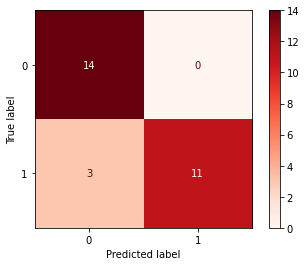

In [91]:
cm=confusion_matrix(y_val_new,pred)
cmp=ConfusionMatrixDisplay(cm)
cmp.plot(cmap=plt.cm.Reds)

精度がかなり上がった。

### 考察  
株価の予測にしては異常に精度が高いので、どこか間違えている可能性